# Project 5 -- Rafee Adnan

**TA Help:**
    
**Collaboration:** 


## Question 1

In [1]:
options(jupyter.rich_display = F)

In [2]:
options(repr.matrix.max.cols = 25, repr.matrix.max.rows = 25)

In [3]:
myDF <- read.csv("/anvil/projects/tdm/data/election/escaped/itcont2020sample.txt", sep="|")

In [4]:
head(myDF)

  CMTE_ID   AMNDT_IND RPT_TP TRANSACTION_PGI IMAGE_NUM    TRANSACTION_TP
1 C00401224 N         YE                     2.020013e+17 24T           
2 C00401224 N         M4     P               2.020042e+17 24T           
3 C00193433 N         YE     P               2.020012e+17 15            
4 C00401224 N         YE                     2.020013e+17 24T           
5 C00401224 N         MY                     2.019073e+17 24T           
6 C00618371 N         Q3     P               2.019102e+17 15            
  ENTITY_TP NAME             CITY         STATE ZIP_CODE EMPLOYER    
1 IND       SOLOMON, VICTOR  CAPE CORAL   FL    33904    RETIRED     
2 IND       MYERS, ELIZABETH SCOTTSVILLE  NY    14546    NOT EMPLOYED
3 IND       HASKINS, GEORGE  HARTSDALE    NY    10530    NOT EMPLOYED
4 IND       KOLBE, NINA      WASHINGTON   DC    20003    SELF        
5 IND       ESSENBERG, PENNY GRAND RAPIDS MI    49534                
6 IND       GIEBEL, BETTY    KISSIMMEE    FL    34744    HOMEMAKER   

In [5]:
library(lubridate, warn.conflicts = FALSE)

Warning message in system("timedatectl", intern = TRUE):
"running command 'timedatectl' had status 1"


In [6]:
myDF$newdates <- mdy(myDF$TRANSACTION_DT)

In [7]:
head(myDF$TRANSACTION_DT)

[1]  7112019  3042020 12182019  8302019  3212019  7112019

In [8]:
head(myDF$newdates)

[1] "2019-07-11" "2020-03-04" "2019-12-18" "2019-08-30" "2019-03-21"
[6] "2019-07-11"

In [9]:
sum(myDF$TRANSACTION_AMT)

[1] 1067589940

In [10]:
myResults <- tapply(myDF$TRANSACTION_AMT, myDF$newdates, sum) 

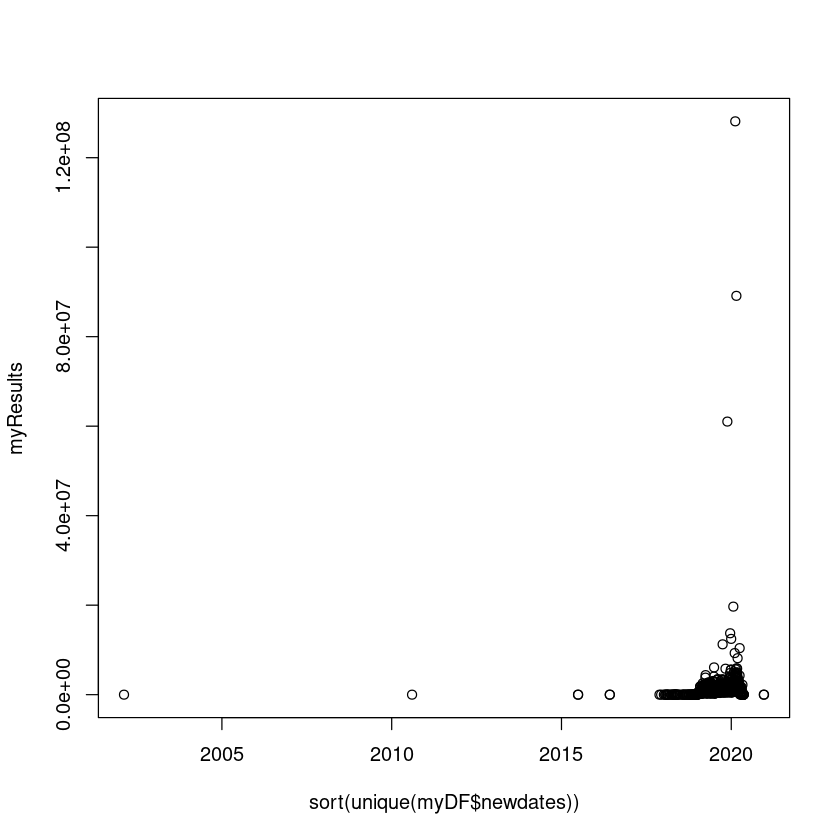

In [11]:
plot(sort(unique(myDF$newdates)), myResults)

a) The two most recent head function calls show that the newdates column is TRANSACTION_DT but in year-month-day order.

b) shown above

c) shown above

## Question 2

In [12]:
newDF <- subset(myDF, newdates >= mdy(1012019) 
                & newdates <= mdy(5152019))

In [13]:
dim(newDF)

[1] 495435     22

In [14]:
dim(myDF)

[1] 4678762      22

In [15]:
newResults <- tapply(newDF$TRANSACTION_AMT, newDF$newdates, sum) 

In [16]:
head(newResults)

2019-01-01 2019-01-02 2019-01-03 2019-01-04 2019-01-05 2019-01-06 
    286355     224173     343765     285968     130386     142742 

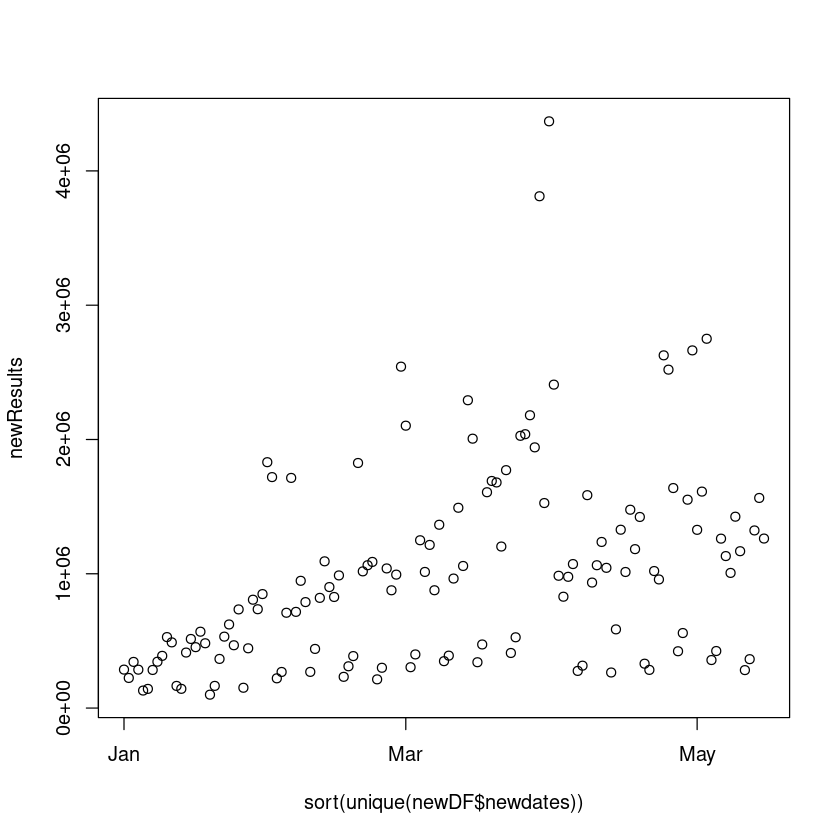

In [17]:
plot(sort(unique(newDF$newdates)), newResults)

a) shown above

b) shown above

c) I noticed that there were much higher points between March and May than between January and March. 

## Question 3

In [18]:
stateDonations <- tapply(myDF$TRANSACTION_AMT, myDF$STATE, sum) 

In [19]:
sum(stateDonations)

[1] 1067589940

In [20]:
myDF$cityState <- paste(myDF$CITY, myDF$STATE, sep = ", ")

In [21]:
head(myDF$cityState)

[1] "CAPE CORAL, FL"   "SCOTTSVILLE, NY"  "HARTSDALE, NY"    "WASHINGTON, DC"  
[5] "GRAND RAPIDS, MI" "KISSIMMEE, FL"   

In [22]:
cityStateDonations <- tapply(myDF$TRANSACTION_AMT, myDF$cityState, sum)

In [23]:
head(sort(cityStateDonations, decreasing = TRUE))

     NEW YORK, NY SAN FRANCISCO, CA    WASHINGTON, DC   LOS ANGELES, CA 
        331576505          38701698          37152618          14141160 
      HOUSTON, TX        DALLAS, TX 
         12463126          11642460 

In [24]:
tail(sort(cityStateDonations, decreasing = TRUE))

       DARIEN, NY   GARDEN CITY, NJ        WILSON, AR PLEASANT HILL, TN 
            -2800             -2800             -2800             -4295 
        HOXIE, KS        HEFLIN, AL 
            -8150             -9983 

In [25]:
head(cityStateDonations)

               # B, CA              $0.00, PA             $20.00, PA 
                   200                    122                     40 
            $49.02, PA             $72.53, PA 'CRESCENT CITY' CA, CA 
                    98                    145                     81 

a) $1,067,589,940

b) shown above

c) There are NA values for the cities, states, and dollar amounts for some of the data points which cause weird results to show up as seen in the head of the cityStateDonations vector. There are also negative numbers towards the tail of the vector which can be explained by refunds or paying back people.

## Question 4

In [26]:
class(myDF$NAME)

[1] "character"

In [27]:
splitNames <- sapply(strsplit(myDF$NAME, split = ", "), "[", 2)

In [28]:
myDF$firstName <- splitNames

In [29]:
head(myDF$NAME)

[1] "SOLOMON, VICTOR"  "MYERS, ELIZABETH" "HASKINS, GEORGE"  "KOLBE, NINA"     
[5] "ESSENBERG, PENNY" "GIEBEL, BETTY"   

In [30]:
head(myDF$firstName)

[1] "VICTOR"    "ELIZABETH" "GEORGE"    "NINA"      "PENNY"     "BETTY"    

In [31]:
sum(myDF$TRANSACTION_AMT[grepl(", MARY ", myDF$NAME)])

[1] 4007115

a) character is the type of variable that myDF$NAME is.

b) From cell 123 and 124 above, the firstName column matches the first name of the NAME column in myDF. I used https://stat.ethz.ch/pipermail/r-help/2005-August/078026.html to help me complete this part.

c) The sum of money donated by people named Mary is $4,007,115.

## Question 5

In [32]:
notemployed <- sum(myDF$TRANSACTION_AMT[myDF$EMPLOYER == "NOT EMPLOYED"], na.rm = TRUE)

In [33]:
employed <- sum(myDF$TRANSACTION_AMT[myDF$EMPLOYER != "NOT EMPLOYED" & myDF$EMPLOYER != "" & myDF$EMPLOYER != "NONE" ], na.rm = TRUE)

In [34]:
donType <- c(notemployed, employed) 

In [35]:
names(donType) <- c("NOT EMPLOYED", "EMPLOYED")

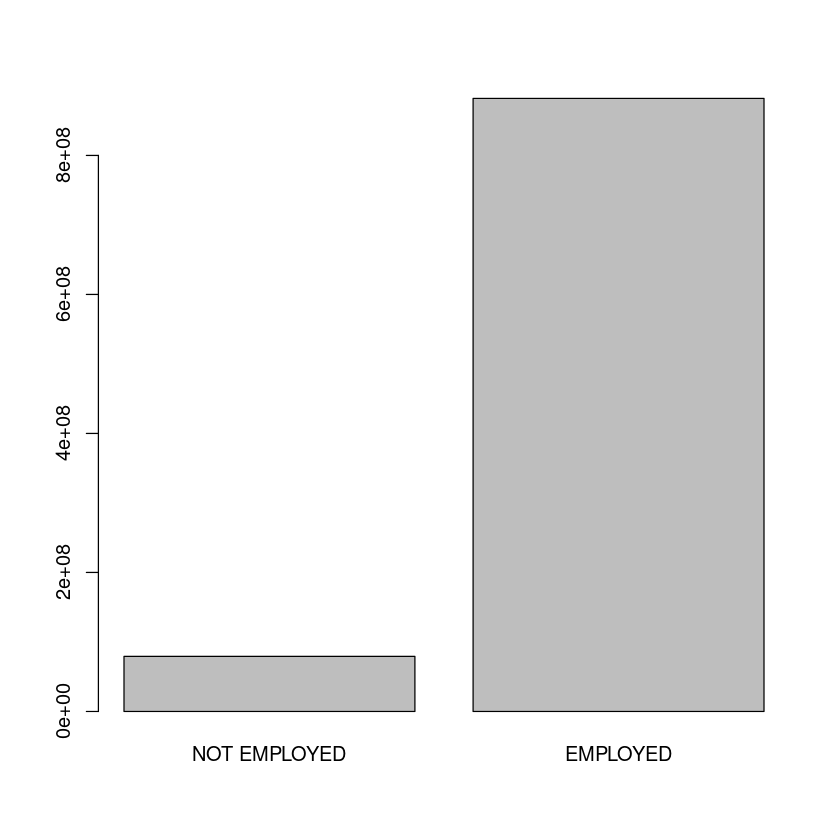

In [36]:
barplot(donType)

In [37]:
donType

NOT EMPLOYED     EMPLOYED 
    79250204    882041447 

In [38]:
head(sort(tapply(myDF$TRANSACTION_AMT, myDF$OCCUPATION, sum), decreasing=TRUE))

     FOUNDER      RETIRED NOT EMPLOYED                  ATTORNEY          CEO 
   279442327     98774206     84855951     77364020     31326953     25055647 

In [71]:
numNotEmployeed <- sum(myDF$EMPLOYER == "NOT EMPLOYED", na.rm = TRUE)

In [72]:
numEmployed <- sum(myDF$EMPLOYER != "NOT EMPLOYED" & myDF$EMPLOYER != "" & myDF$EMPLOYER != "NONE", na.rm = TRUE)

In [73]:
employCount <- c(numNotEmployeed, numEmployed)

In [74]:
names(employCount) <- c("Not Employed", "Employed")

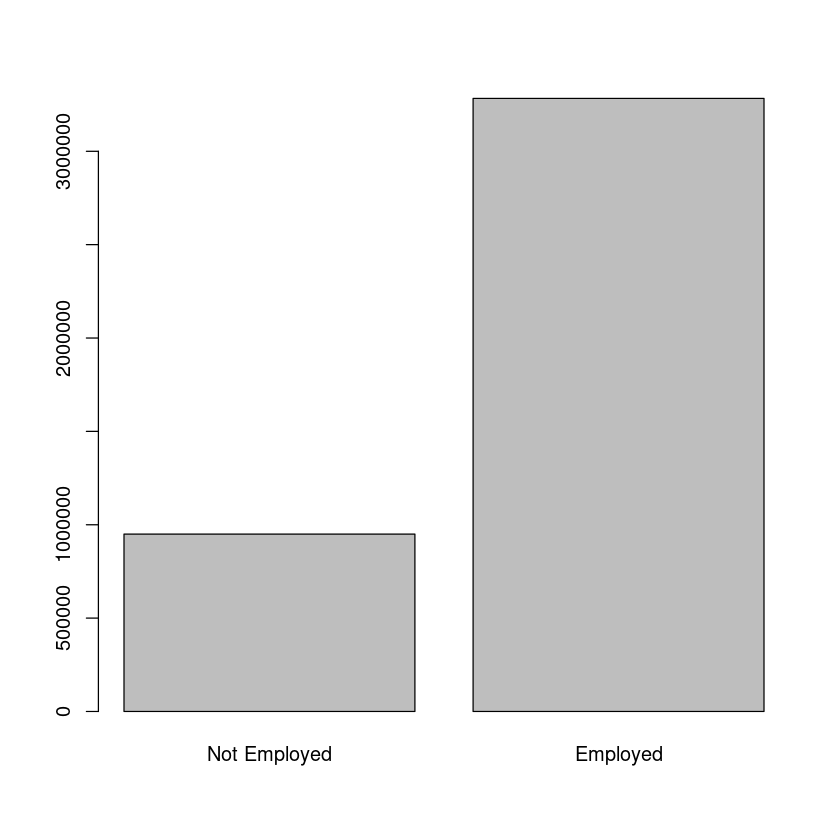

In [77]:
barplot(employCount)

In [79]:
numNotEmployeed

[1] 949959

In [80]:
numEmployed

[1] 3283237

a) shown above

b) Founder is the category of occupation that donates the most money.

c) Something interesting that I discovered was that the number of people that are not employed according to the data frame is close to 1 million while there are over 3 million people who are employed.

## Pledge

By submitting this work I hereby pledge that this is my own, personal work. I've acknowledged in the designated place at the top of this file all sources that I used to complete said work, including but not limited to: online resources, books, and electronic communications. I've noted all collaboration with fellow students and/or TA's. I did not copy or plagiarize another's work.

> As a Boilermaker pursuing academic excellence, I pledge to be honest and true in all that I do. Accountable together – We are Purdue.